In [1]:
from embiggen.sequences import EdgePredictionSequence

Using TensorFlow backend.


In [2]:
from ensmallen_graph.datasets.linqs import Cora

In [3]:
"""Load the graph and its features."""
from typing import Callable, Tuple
import pandas as pd
from ensmallen_graph import EnsmallenGraph
from ensmallen_graph.datasets.linqs.parse_linqs import get_words_data


def load_graph_and_features(graph_loader: Callable) -> Tuple[EnsmallenGraph, pd.DataFrame]:
    """Return graph and its features.

    Parameters
    ------------------------
    graph_loader: Callable,
        Method to use to load the graphs.

    Returns
    ------------------------
    Tuple with loaded graph and its features.
    """
    complete_graph = graph_loader()

    graph_without_words = complete_graph.remove(
        deny_node_types_set=set(["Word", "Unknown"]),
    ).remove(
        singletons=True,
        selfloops=True
    )

    return graph_without_words, get_words_data(complete_graph)


In [5]:
graph, features = load_graph_and_features(Cora)

Extracting words features:   0%|          | 0/4141 [00:00<?, ?it/s]

In [18]:
from collections import Counter

counter_positive = Counter()
counter_negative = Counter()

for (src, dst), label in EdgePredictionSequence(graph):
    counter_positive.update(src[label])
    counter_negative.update(src[~label])
    counter_positive.update(dst[label])
    counter_negative.update(dst[~label])

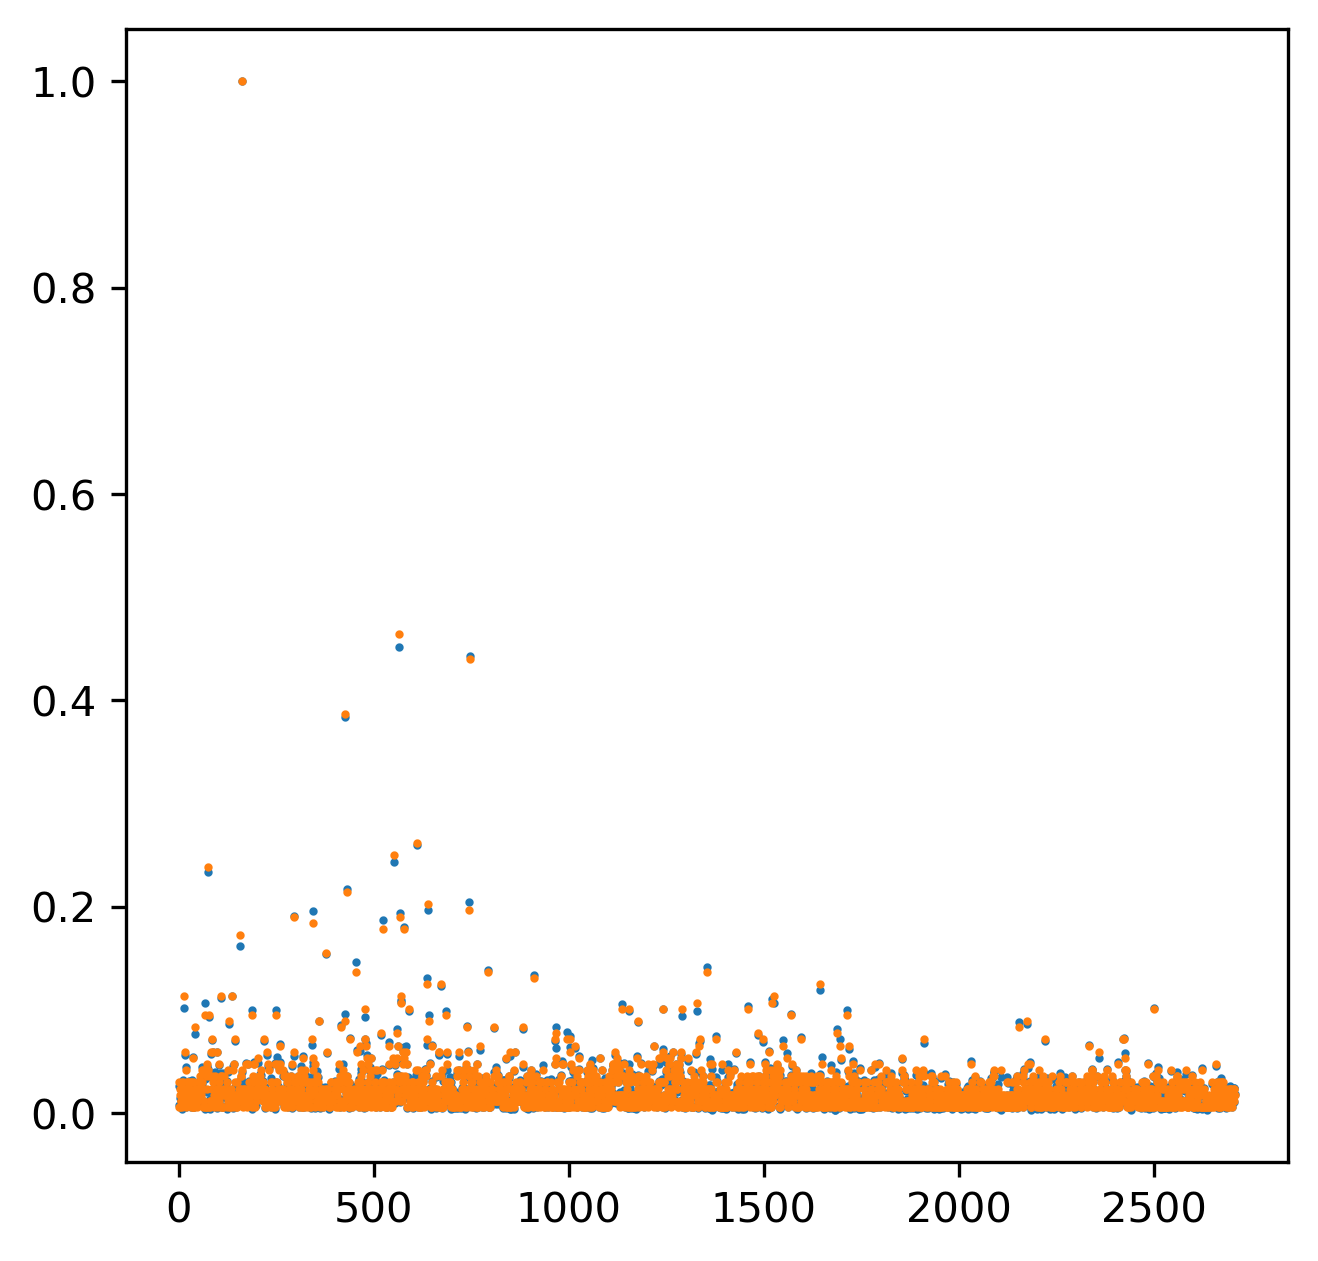

In [30]:
import matplotlib.pyplot as plt
import numpy as np

fig, axis = plt.subplots(figsize=(5,5), dpi=300)

values = np.array(list(counter_positive.values()))
values = values/values.max()
degrees = np.array([
    graph.degree(node_id)
    for node_id in counter_positive.keys()
]) / graph.max_degree()

axis.scatter(counter_positive.keys(), values, s=1)
axis.scatter(counter_positive.keys(), degrees, s=1)

In [22]:
len(counter_negative

[(1729, 132),
 (23, 132),
 (2430, 130),
 (776, 130),
 (1129, 129),
 (2630, 127),
 (2211, 127),
 (761, 127),
 (1086, 127),
 (451, 126),
 (1872, 126),
 (1737, 125),
 (2643, 125),
 (724, 125),
 (627, 124),
 (2325, 124),
 (1111, 124),
 (60, 124),
 (2336, 123),
 (646, 123),
 (390, 123),
 (225, 123),
 (1249, 123),
 (1462, 123),
 (2067, 122),
 (1629, 122),
 (1339, 122),
 (1381, 121),
 (611, 121),
 (2498, 121),
 (78, 121),
 (2610, 121),
 (360, 121),
 (0, 121),
 (2147, 120),
 (2083, 120),
 (2406, 120),
 (280, 120),
 (1532, 120),
 (1182, 120),
 (2131, 120),
 (1383, 120),
 (2501, 119),
 (1144, 119),
 (2631, 119),
 (1759, 119),
 (1829, 119),
 (2383, 119),
 (1197, 119),
 (2256, 119),
 (1306, 119),
 (490, 119),
 (2032, 118),
 (111, 118),
 (1493, 118),
 (2116, 118),
 (20, 118),
 (816, 118),
 (2227, 118),
 (821, 118),
 (1170, 118),
 (1091, 118),
 (1189, 118),
 (618, 118),
 (1519, 118),
 (494, 117),
 (1222, 117),
 (1822, 117),
 (1483, 117),
 (68, 117),
 (1644, 117),
 (2425, 117),
 (2413, 117),
 (480, 1